## 4.1 数据处理工具箱概述

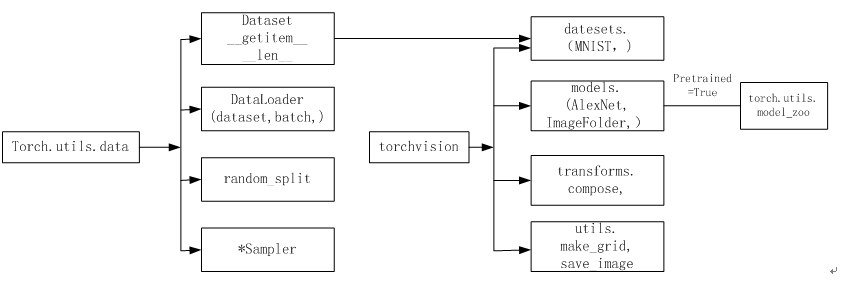
<center>图4-1 Pytorch主要数据处理工具</center>
图4-1 的左边是torch.utils.data工具包，它包括以下三个类：

（1）Dataset：是一个抽象类，其它数据集需要继承这个类，并且覆写其中的两个方法(\__getitem__、\__len__)。

（2）DataLoader：定义一个新的迭代器，实现批量（batch）读取，打乱数据（shuffle）并提供并行加速等功能。

（3）random_split：把数据集随机拆分为给定长度的非重叠新数据集。

（4）*sampler：多种采样函数。

图4-1中间是Pytorch可视化处理工具（torchvision），Pytorch的一个视觉处理工具包，独立于Pytorch，需要另外安装，使用pip或conda安装即可

torchvision包括4个类，各类的主要功能如下：

（1）datasets:提供常用的数据集加载，设计上都是继承torch.utils.data.Dataset，主要包括MMIST、CIFAR10/100、ImageNet、COCO等。

（2）models:提供深度学习中各种经典的网络结构以及训练好的模型(如果选择pretrained=True)，包括AlexNet, VGG系列、ResNet系列、Inception系列等。

（3）transforms:常用的数据预处理操作，主要包括对Tensor及PIL Image对象的操作。

（4）utils:含两个函数，一个是make_grid，它能将多张图片拼接在一个网格中；另一个是save_img，它能将Tensor保存成图片。

## 4.2 utils.data简介

utils.data包括Dataset和DataLoader。

torch.utils.data.Dataset为抽象类。自定义数据集需要继承这个类，并实现两个函数。一个是\__len__，另一个是\__getitem__，前者提供数据的大小(size)，后者通过给定索引获取数据和标签。 \__getitem__一次只能获取一个数据。

通过torch.utils.data.DataLoader来定义一个新的迭代器，实现batch读取。首先我们来定义一个简单的数据集，然后具体使用Dataset及DataLoader，以便有个直观认识。

**（1）导入需要的模块**

In [1]:
import torch
from torch.utils import data
import numpy as np

**（2）定义数据集**

In [2]:
class TestDataset(data.Dataset):#继承Dataset
    def __init__(self):
        self.Data=np.asarray([[1,2],[3,4],[2,1],[3,4],[4,5]])#一些由2维向量表示的数据集
        self.Label=np.asarray([0,1,0,1,2])#这是数据集对应的标签

    def __getitem__(self, index):
        #把numpy转换为Tensor
        txt=torch.from_numpy(self.Data[index])
        label=torch.tensor(self.Label[index])
        return txt,label 

    def __len__(self):
        return len(self.Data)

**（3）实例化数据集，调用\_len_和\_getitem_**

In [3]:
Test=TestDataset()
print(Test[2])  #相当于调用__getitem__(2)
print(Test.__len__())


#輸出：
#(tensor([2, 1]), tensor(0))
#5

(tensor([2, 1], dtype=torch.int32), tensor(0, dtype=torch.int32))
5


以上数据以tuple返回，每次只返回一个样本。实际上，Dateset只负责数据的抽取，一次调用__getitem__只返回一个样本。如果希望批量处理(batch)，同时还要进行shuffle和并行加速等操作，可选择DataLoader。DataLoader的格式为：

**主要参数说明：**

 dataset: 加载的数据集；

 batch_size: 批大小；

 shuffle：是否将数据打乱；

 sampler：样本抽样

 num_workers：使用多进程加载的进程数，0代表不使用多进程；

 collate_fn：如何将多个样本数据拼接成一个batch，一般使用默认的拼接方式即可；

 pin_memory：是否将数据保存在pin memory区，pin memory中的数据转到GPU会快一些；

 drop_last：dataset 中的数据个数可能不是 batch_size的整数倍，drop_last为True会将多出来不足一个batch的数据丢弃。

**（4）使用DataLoader来进行遍历**

In [7]:
test_loader = data.DataLoader(Test,batch_size=2,shuffle=False,num_workers=0)
for i,traindata in enumerate(test_loader):
    print('i:',i)
    Data,Label=traindata
    print('data:',Data)
    print('Label:',Label)


i: 0
data: tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
Label: tensor([0, 1], dtype=torch.int32)
i: 1
data: tensor([[2, 1],
        [3, 4]], dtype=torch.int32)
Label: tensor([0, 1], dtype=torch.int32)
i: 2
data: tensor([[4, 5]], dtype=torch.int32)
Label: tensor([2], dtype=torch.int32)


可以看到数据被打印出来，每一次打印的是batch_size这么多个数据和它对应的label，因为最后一个不够batch_size的大小，所以是一个数据，和label。

从这个结果可以看出，这是批量读取。我们可以像使用迭代器一样使用它,如对它进行循环操作。**不过它不是迭代器，我们可以通过iter命令转换为迭代器。**

In [11]:
dataiter=iter(test_loader)
# imgs,labels=next(dataiter)
for img,label in dataiter:
    print(img,label,'\n')
#imgs.size()

tensor([[1, 2],
        [3, 4]], dtype=torch.int32) tensor([0, 1], dtype=torch.int32) 

tensor([[2, 1],
        [3, 4]], dtype=torch.int32) tensor([0, 1], dtype=torch.int32) 

tensor([[4, 5]], dtype=torch.int32) tensor([2], dtype=torch.int32) 



一般用data.Dataset处理同一个目录下的数据。如果数据在不同目录下，不同目录代表不同类别（这种情况比较普遍），使用data.Dataset来处理就不很方便。不过，可以使用Pytorch另一种可视化数据处理工具（即torchvision）就非常方便，不但可以自动获取标签，还提供很多数据预处理、数据增强等转换函数。

## 4.3 torchvision简介

torchvision有4个功能模块，model、datasets、transforms和utils。其中model后续章节将介绍，利用datasets下载一些经典数据集，上一篇3.2有实例，大家可以参考一下。这节我们将主要介绍如何使用datasets的ImageFolder处理自定义数据集，如何使用transforms对源数据进行预处理、增强等。

### 4.3.1 transforms

transforms提供了对PIL Image对象和Tensor对象的常用操作。

（1）对PIL Image的常见操作如下：

 Scale/Resize: 调整尺寸，长宽比保持不变；

 CenterCrop、RandomCrop、RandomSizedCrop：裁剪图片，CenterCrop和RandomCrop在crop时是固定size，RandomResizedCrop则是random size的crop；

 Pad: 填充；

 ToTensor: 把一个取值范围是[0,255]的PIL.Image 转换成 Tensor。形状为(H,W,C)的numpy.ndarray，转换成形状为[C,H,W]，取值范围是[0,1.0]的torch.FloatTensor。

 RandomHorizontalFlip:图像随机水平翻转，翻转概率为0.5;

 RandomVerticalFlip: 图像随机垂直翻转;

 ColorJitter: 修改亮度、对比度和饱和度。

（2）对Tensor的常见操作如下：

 Normalize: 标准化，即减均值，除以标准差；

 ToPILImage:将Tensor转为PIL Image。

如果要对数据集进行多个操作，可通过Compose将这些操作像管道一样拼接起来，类似于nn.Sequential。以下为示例代码

**（1）导入模块**

In [12]:
import torch
import torchvision
import torchvision.transforms as transforms

**（2)使用transforms.Compose将操作拼接**

In [13]:
transforms.Compose([
    #将给定的 PIL.Image 进行中心切割，得到给定的 size，
    #size 可以是 tuple，(target_height, target_width)。
    #size 也可以是一个 Integer，在这种情况下，切出来的图片形状是正方形。            
    transforms.CenterCrop(10),
    #切割中心点的位置随机选取
    transforms.RandomCrop(20, padding=0),
    #把一个取值范围是 [0, 255] 的 PIL.Image 或者 shape 为 (H, W, C) 的 numpy.ndarray，
    #转换为形状为 (C, H, W)，取值范围是 [0, 1] 的 torch.FloatTensor
    transforms.ToTensor(),
    #规范化到[-1,1]
    transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))
])

Compose(
    CenterCrop(size=(10, 10))
    RandomCrop(size=(20, 20), padding=0)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

### 4.3.2 ImageFolder

我们可以利用 torchvision.datasets.ImageFolder 来直接构造出 dataset，ImageFolder 会将目录中的文件夹名自动转化成序列，那么DataLoader载入时，标签自动就是整数序列了。

下面我们利用ImageFolder读取不同目录下图片数据，然后使用transorms进行图像预处理，预处理有多个，我们用compose把这些操作拼接在一起。然后使用DataLoader加载。

对处理后的数据用torchvision.utils中的save_image保存为一个png格式文件，然后用Image.open打开该png文件，详细代码如下：

tensor([2, 2, 2, 2, 1, 0, 1, 2])


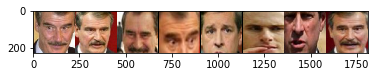

In [20]:
# 导入模块
from torchvision import transforms, utils
from torchvision import datasets
import torch
import matplotlib.pyplot as plt 
%matplotlib inline

# 对图像的操作
my_trans=transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
# 载入一个文件夹的数据
train_data = datasets.ImageFolder('../data/torchvision_data', transform=my_trans)
train_loader = data.DataLoader(train_data,batch_size=8,shuffle=True,)
                                            
for i_batch, img in enumerate(train_loader):
    if i_batch == 0:
        print(img[1])
        fig = plt.figure()
        grid = utils.make_grid(img[0])
        plt.imshow(grid.numpy().transpose((1, 2, 0)))
        plt.show()
        utils.save_image(grid,'test01.png')
    break


解释这句话：plt.imshow(grid.numpy().transpose((1, 2, 0)))。因为在plt.imshow在现实的时候输入的是（imagesize,imagesize,channels）,而def imshow(img,text,should_save=False)中，参数img的格式为（channels,imagesize,imagesize）,这两者的格式不一致，我们需要调用一次transpose函数，将npimg的数据格式由（channels,imagesize,imagesize）转化为（imagesize,imagesize,channels）,进行格式的转换后方可进行显示。

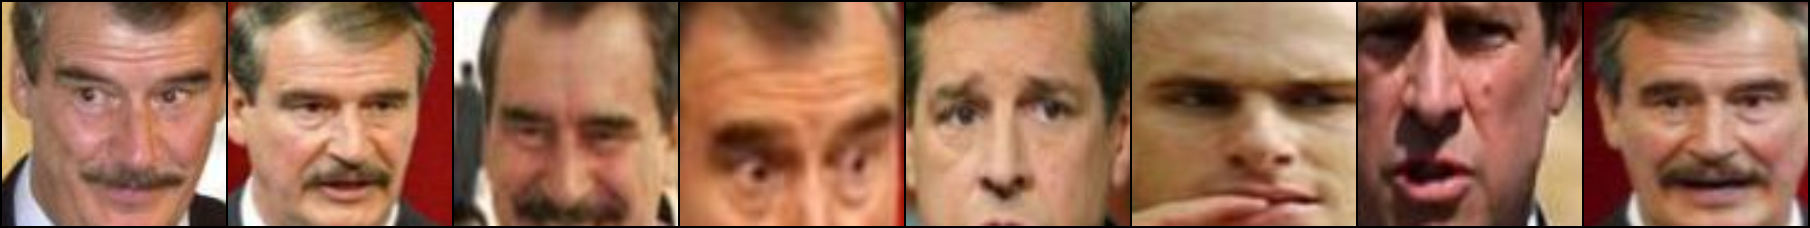

In [21]:
from PIL import Image
Image.open('test01.png')

## 4.4 可视化工具

Tensorboard是Google TensorFlow 的可视化工具，它可以记录训练数据、评估数据、网络结构、图像等，并且可以在web上展示，对于观察神经网路训练的过程非常有帮助。PyTorch可以采用tensorboard_logger, visdom等可视化工具，但这些方法比较复杂或不够友好。为解决这一问题，人们推出了可用于Pytorch可视化的新的更强大工具tensorboardX。

### 4.4.1 tensorboardX简介
tensorboardX功能很强大，支持scalar, image, figure, histogram, audio, text, graph, onnx_graph, embedding, pr_curve and videosummaries等可视化方式。
安装也比较方便，先安装tensorflow（CPU或GPU版），然后安装tensorboardX,在命令行运行pip install tensorboardX命令即可。

使用tensorboardX的一般步骤为：

（1）导入tensorboardX，实例化SummaryWriter类，指明记录日志路径等信息。

In [30]:
# 该代码不能运行，只是一个结构展示
from tensorboardX import SummaryWriter
#实例化SummaryWriter，并指明日志存放路径。在当前目录没有logs目录将自动创建。
writer = SummaryWriter(log_dir=r'../logs', comment='')  
#调用实例
# writer.add_xxx()
writer.add_scalar()
#关闭writer
writer.close()

TypeError: add_scalar() missing 2 required positional arguments: 'tag' and 'scalar_value'

**【说明】**

①如果是windows环境，log_dir注意路径解析，如
writer = SummaryWriter(log_dir=r'D:\myboard\test\logs')

②SummaryWriter的格式为SummaryWriter(log_dir=None, comment='', **kwargs)  其中comment在文件命名加上comment后缀

③如果不写log_dir,系统将在当前目录创建一个runs的目录。

（2）调用相应的API接口，接口一般格式为：

add_xxx(tag-name, object, iteration-number)#即add_xxx(标签，记录的对象，迭代次数)

（3）启动tensorboard服务

cd到logs目录所在的同级目录，在命令行输入如下命令，logdir等式右边可以是相对路径或绝对路径。

tensorboard --logdir=logs --port 6006   
#如果是windows环境，要注意路径解析，如
#tensorboard --logdir=r'D:\myboard\test\logs' --port 6006

（4）web展示

在浏览器输入：http://服务器IP或名称:6006  #如果是本机，服务器名称可以使用localhost


### 4.4.2用tensorboardX可视化神经网络

上节我们介绍了tensorboardX的主要内容，为帮助大家更好理解，这节我们将介绍几个实例。实例内容涉及如何使用tensorboardX可视化神经网络模型、可视化损失值、图像等。

**（1）导入需要的模块**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from tensorboardX import SummaryWriter

**（2）构建神经网络**

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        self.bn = nn.BatchNorm2d(20)

    def forward(self, x):
        x = F.max_pool2d(self.conv1(x), 2)
        x = F.relu(x) + F.relu(-x)
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = self.bn(x)
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

In [3]:
#定义输入
input = torch.rand(32, 1, 28, 28)
#实例化神经网络
model = Net()
#将model保存为graph
with SummaryWriter(log_dir='logs',comment='Net') as w:
    w.add_graph(model, (input, ))

打开浏览器，可看到如下图形
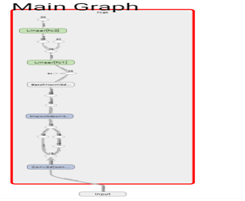

### 4.4.3用tensorboardX可视化损失值

In [4]:
import torch
import torch.nn as nn
from tensorboardX import SummaryWriter
import numpy as np

input_size = 1
output_size = 1
num_epoches = 60
learning_rate = 0.01

dtype = torch.FloatTensor
writer = SummaryWriter(log_dir='logs',comment='Linear')
np.random.seed(100) 
x_train = np.linspace(-1, 1, 100).reshape(100,1) 
y_train = 3*np.power(x_train, 2) +2+ 0.2*np.random.rand(x_train.size).reshape(100,1) 


model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epoches):
    inputs = torch.from_numpy(x_train).type(dtype)
    targets = torch.from_numpy(y_train).type(dtype)

    output = model(inputs)
    loss = criterion(output, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 保存loss的数据与epoch数值
    writer.add_scalar('训练损失值', loss, epoch)
    

打开浏览器可看到如下图形
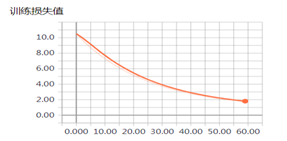